<a href="https://colab.research.google.com/github/marcinwolter/Autoencoder/blob/main/Autoencoder_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'> **Outlier detection with autoencoders**

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction.

<img src='https://stackabuse.s3.amazonaws.com/media/image-reconstruction-and-denoising-with-autoencoders-in-python-and-keras-3.png' width=500px>

# **Simple autoencoder**

In [68]:
import keras
import numpy as np
np.random.seed(10)

In [69]:
import numpy as np
from tensorflow.keras import layers
from keras.models import Model


# Read MNIST data

In [70]:
data = np.load("new_background_data.npy", allow_pickle=True)

In [71]:
keys = list(data.item().keys())

In [72]:
max_length = max([len(data.item().get(key)) for key in keys])
max_length

47867

In [73]:
traning_data = {}

for key in keys:
    traning_data[key] = data.item().get(key)

In [74]:
def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo

In [75]:
training_data = padding_data(traning_data)

In [76]:
traning_matrix = np.array([values for values in traning_data.values()])

In [77]:
traning_matrix.shape

(196, 47867)

In [82]:
clean_matrix.shape

(47867, 196)

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(clean_matrix[:,:2], test_size=0.2, random_state=42)


# Reshape data (only if you use the fully connected network)

In [84]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [85]:
x_train.shape

(38293, 2)

In [86]:
x_test.shape

(9574, 2)

In [87]:
def paint(key, m, list):
    biny = bins(m, list)
    plt.hist(list, bins=biny, color='blue')
    plt.title(keys[key])
    plt.show()

In [ ]:
for i in range(10):
    paint(i, 100, x_train[:,i])

# Hyperparameters

In [89]:
encoding_dim = 2 # valid for fully connected network only
batch_size = 128
epochs = 10 #100

# **Fully connected autoencoder**

In [90]:
input_shape = x_train.shape[1]
# This is our input image
input_img = layers.Input(shape=(input_shape,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(2, activation='relu')(input_img)
#encoded = layers.Dense(64, activation='relu')(encoded)
#encoded = layers.Dense(32, activation='relu')(encoded)

#encoded = layers.Dense(128, activation='relu')(encoded)
#encoded = layers.Dropout(0.05)(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(2, activation='relu')(encoded)
#decoded = layers.Dense(128, activation='relu')(decoded)
#decoded = layers.Dense(128, activation='relu')(decoded)

#decoded = layers.Dense(518, activation='relu')(decoded)
#decoded = layers.Dropout(0.05)(decoded)
decoded = layers.Dense(input_shape, activation='sigmoid')(decoded)


# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#encoder = Model(input_img, encoded)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

# **Convolutional autoencoder**

Should work better than the fully connected one

# Train the autoencoder

In [91]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, x_test))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6614 - val_loss: 0.5744
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.5503 - val_loss: 0.4836
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.4655 - val_loss: 0.4148
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.4013 - val_loss: 0.3628
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.3530 - val_loss: 0.3236
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3163 - val_loss: 0.2939
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.2886 - val_loss: 0.2715
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.2680 - val_loss: 0.2545
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.2523 - val_loss: 0.2417
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.2401 - val_loss: 0.2321


# Plot history

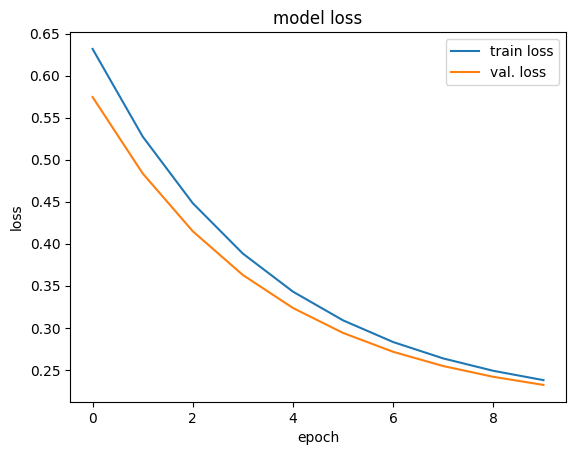

In [92]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','val. loss'], loc='upper right')
plt.show()

# Plot digits

In [93]:
decoded_data = autoencoder.predict(x_test)

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step


In [32]:
def bins(n, list):
    bins = []

    list = sorted(list)

    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n


    return bins

In [33]:
def paint(key, m, list):
    biny = bins(m, list)
    plt.hist(list, bins=biny, color='blue')
    plt.title(keys[key])
    plt.show()

In [31]:
decoded_data.shape

(9574, 196)

# Read fashion mnist

In [33]:
data = np.load("new_signal_data.npy", allow_pickle=True)
keys = list(data.item().keys())
max_length = max([len(data.item().get(key)) for key in keys])
signal_data = {}

for key in keys:
    signal_data[key] = data.item().get(key)


def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo


signal_data = padding_data(signal_data)
signal_matrix = np.array([values for values in signal_data.values()])
signal_matrix.shape

(196, 22876)

In [34]:
signal_matrix = signal_matrix.T

In [35]:
clean_signal_matrix = signal_matrix[:,~np.all(np.isnan(signal_matrix), axis=0)]


In [36]:
clean_signal_matrix.shape

(22876, 196)

# Reshape fashion data (only if you use the fully connected network)

In [45]:
xs_train, xs_test = train_test_split(clean_signal_matrix, test_size=0.2, random_state=42)

In [46]:
xs_train.shape

(18300, 196)

In [47]:
xs_test.shape

(4576, 196)

In [48]:
xs_train = xs_train.reshape((xs_train.shape[0], -1))
xs_test = xs_test.reshape((xs_test.shape[0], -1))

In [49]:
xs_test.shape

(4576, 196)

In [50]:
xs_train.shape

(18300, 196)

In [ ]:
for i in range(32):
    paint(i, 100, x_test[:,i])

# Calculate the losses for mnist digits and fasion mnist and plot a histogram

In [52]:
signal_output = autoencoder.predict(xs_test)

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


### Reshape only if you use the convolutional autoencoder

In [59]:
def paint(key, m, list, list2):
    biny = bins(m, list)
    plt.hist(list, bins=biny, color='blue')
    plt.hist(list2, bins=biny, color='red')
    plt.title(keys[key])
    plt.show()

In [ ]:
for i in range(2):
    paint(i, 100, x_test[:,i], decoded_data[i])

In [58]:
losses = keras.losses.mean_squared_error(decoded_data, x_test)
#print(losses[0:20])
fashion_losses = keras.losses.mean_squared_error(signal_output, xs_test)
#print(fashion_losses[0:20])

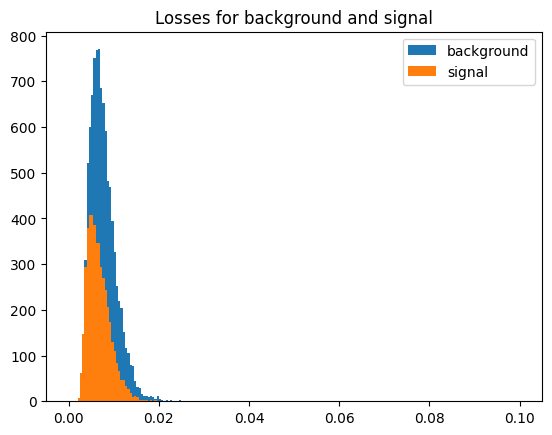

In [59]:
plt.hist(losses,bins=200,range=(0,0.1),label="background",alpha=1)
plt.hist(fashion_losses,bins=200,range=(0,0.1),label="signal",alpha=1)
plt.title("Losses for background and signal")
plt.legend()
#plt.yscale('log')
plt.savefig(f'518-128 E:{epochs}, bach:{batch_size}, dim:{encoding_dim}.png')
plt.show()

In [152]:
def visualize_reconstruction_errors(autoencoder, data):
    decoded_data = autoencoder.predict(data)
    errors = np.mean(np.square(data - decoded_data), axis=1)
    plt.figure(figsize=(10, 5))
    plt.hist(errors, bins=50)
    plt.xlabel('Reconstruction error')
    plt.ylabel('Frequency')
    plt.show()

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


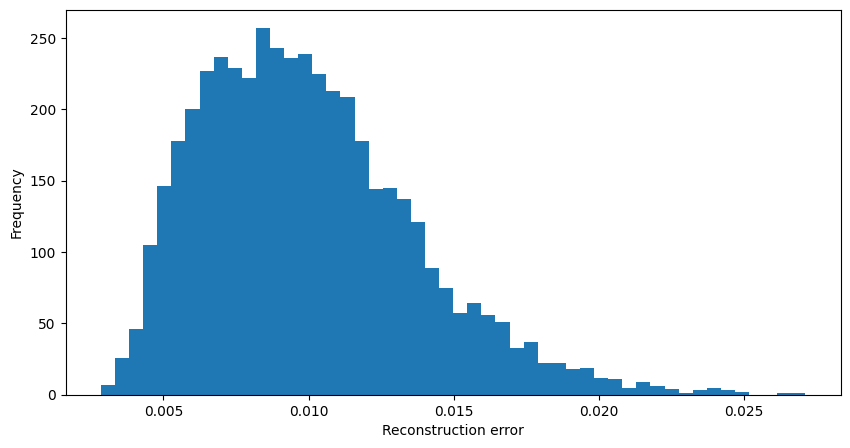

In [153]:
visualize_reconstruction_errors(autoencoder, xs_test)

# Outlier detection

The autoencoder is trained on mnist hand-written digits. Therefore it does not reproduce the fashion elements well, therefore the losses are much higher than for mnist digits. Putting a cut on losses allows to identify the outliers.

### Remark
The autoencoder was never trained on "fashion" images.